In [19]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
import sklearn
from sklearn import linear_model
from sklearn import preprocessing
%matplotlib inline
sns.set_style('white')

In [8]:
data = pd.read_csv('C://duh/Thinkful/CapstoneResearch/GeneratedAgents.csv')

In [15]:
X = data.agr_bhv
Y = data['prop_trr_act']

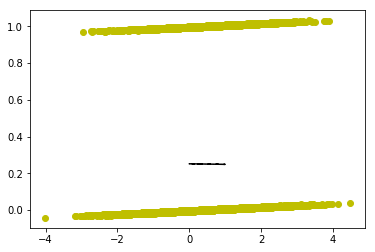

In [18]:
fit = np.polyfit(X, Y, 1)
fit_fn = np.poly1d(fit)
jitter = np.random.randn(10000)

plt.plot(X + jitter, Y + jitter / 100, 'yo', X, fit_fn(X), '--k')
plt.show()

In [82]:
df_data = data.copy()

trainsize = int(df_data.shape[0] / 2)
df_test = df_data.iloc[trainsize:, :].copy()
df_train = df_data.iloc[:trainsize, :].copy()

df_train['fnt_agr'] = df_train['agr_bhv'] * df_train['rel_fnt']
df_train['agr_for'] = df_train['agr_bhv'] * df_train['hst_twd_for']
df_train['agr_rct_act'] = df_train['agr_bhv'] * df_train['lvl_rct_act']
df_train['agr_sqrt'] = (df_train['agr_bhv'] + 100) ** .5
df_train['agr2'] = (df_train['agr_bhv'] + 100) ** 2
df_train['agr3'] = (df_train['agr_bhv'] + 100) ** 3

RRegrTrain = linear_model.Ridge(alpha=5, fit_intercept=False)
Y_train = df_train['prop_trr_act'].values.reshape(-1,1)
X_train = df_train.drop(['prop_trr_act'], 1)
RRegrTrain.fit(X_train, Y_train)
print('\nR-squared Train Model:')
print(RRegrTrain.score(X_train, Y_train))

df_test['fnt_agr'] = df_test['agr_bhv'] * df_test['rel_fnt']
df_test['agr_for'] = df_test['agr_bhv'] * df_test['hst_twd_for']
df_test['agr_rct_act'] = df_test['agr_bhv'] * df_test['lvl_rct_act']
df_test['agr_sqrt'] = (df_test['agr_bhv'] + 100) ** .5
df_test['agr2'] = (df_test['agr_bhv'] + 100) ** 2
df_test['agr3'] = (df_test['agr_bhv'] + 100) ** 3

Y_test = df_test['prop_trr_act']
X_test = df_test.drop(['prop_trr_act'], 1)
print('\nR-squared Test Model:')
print(RRegrTrain.score(X_test, Y_test))


R-squared Train Model:
0.002842096042046327

R-squared Test Model:
-0.00453284573028534


In [78]:
lass = linear_model.Lasso(alpha=2)
lassfit = lass.fit(X_train, Y_train)
print('R-squared for many train features:')
print(lass.score(X_train, Y_train))
print('R-squared for many test features:')
print(lass.score(X_test, Y_test))

R-squared for many train features:
7.258049796532438e-05
R-squared for many test features:
-0.0015362888705039435


In [80]:
data

,ages,gender,religion,role,agr_bhv,rel_fnt,hst_twd_for,lvl_rct_act,crt_agr_lvl,prop_trr_act
0,36,0,0,0,0.224897,0.359316,0.302938,0.082656,0.419023,0
1,23,0,1,2,0.562466,0.766950,0.191666,0.513687,0.632938,0
2,19,0,0,2,0.810583,0.279509,0.476026,0.422530,0.521693,1
3,33,0,0,2,0.950780,0.893176,0.689127,0.164732,0.156903,1
4,34,0,0,0,0.652642,0.613568,0.212403,0.876196,0.891090,0
5,44,0,0,1,0.445411,0.372294,0.795012,0.060284,0.335152,0
6,34,0,0,0,0.404324,0.009005,0.650959,0.630051,0.504162,0
7,45,0,1,1,0.562371,0.674549,0.407208,0.183633,0.178580,1
8,27,1,0,0,0.902950,0.174371,0.933863,0.636047,0.961556,0
9,40,1,0,1,0.406215,0.919284,0.056355,0.867678,0.578998,0
